# Theta phase analysis for all pyramidal cells
##### - Requires df_all_cells_theta.pkl produced from All Pyramidal Cells Analysis.ipynb, which contains theta phase and position sector for all spikes
##### - Largely involves comparison of Rayleigh vectors across different ages and trial types, calculated with rayleigh_vector.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from ephys import *
from rayleigh_vector import rayleigh_vector

# Set age bins
age_bins = [(22, 26), (27, 29), (30, 35)]

# Load pickled data with theta phase
df_all_cells = pd.read_pickle('/home/isabella/Documents/isabella/jake/ephys_analysis/processed_data/df_all_cells_theta.pkl')

## Plot Rayleigh Vector Distribution by Age Bin

In [2]:
# Drop rows with no included clusters
df_all_cells = df_all_cells.dropna()
print(f'{len(df_all_cells.index)} sessions retained')

# Initialise dataframe for storing rayleigh vector info, and cluster phase and sector info
df_rayleigh = pd.DataFrame(data = None, index = None, columns = ['animal', 'age', 'date', 'trial_type', 'session', 'rayleigh_vector_length', 'rayleigh_vector_angle', 'cluster_phases', 'cluster_sectors'])

# Loop through all sessions
for index, obj in df_all_cells['ephys_object'].items():

    # Get rayleigh vector info for each cluster
    rayleigh_info = obj.cluster_rayleigh

    # Get age and animal ID
    age = int(obj.age)
    animal = obj.animal
    date = obj.date_short
    session = obj.sorting_path

    # Loop through each trial
    for trial_iterator, trial in enumerate(obj.trial_list):
        # Get rayleigh vector info for each cluster
        rayleigh_info = obj.cluster_rayleigh[trial_iterator]

        # Loop through each cluster
        for cluster in rayleigh_info.keys():
            # Get rayleigh vector info for cluster
            vector_length = rayleigh_info[cluster][0]
            vector_angle = rayleigh_info[cluster][1]

            # Get trial type
            if 't-maze' in trial:
                trial_type = 't-maze'
            elif 'open-field' in trial:
                trial_type = 'open-field'
            else:
                trial_type = 'other'
            
            
            # Collect cluster phases and sectors for the trial
            cluster_phases = obj.cluster_phases[trial_iterator][cluster]
            cluster_sectors = obj.cluster_sectors[trial_iterator][cluster]

            # Skip all cells with < 100 spikes
            if len(cluster_phases) < 100:
                print(f'Skipping cell {index} with {len(cluster_phases)} spikes')
                continue

            # Add to dataframe with trial name as index
            df_rayleigh.loc[f'{trial}_{cluster}', :] = [animal, age, date, trial_type, session, vector_length, vector_angle, cluster_phases, cluster_sectors]

df_rayleigh

29 sessions retained
Skipping cell 230506_r1354 with 27 spikes
Skipping cell 230507_r1354 with 5 spikes
Skipping cell 230507_r1354 with 67 spikes
Skipping cell 230607_r1364 with 83 spikes
Skipping cell 230607_r1364 with 31 spikes
Skipping cell 230607_r1364 with 63 spikes
Skipping cell 230607_r1364 with 23 spikes
Skipping cell 230607_r1364 with 81 spikes
Skipping cell 230610_r1364 with 81 spikes
Skipping cell 230610_r1364 with 70 spikes
Skipping cell 230611_r1364 with 61 spikes
Skipping cell 230611_r1364 with 56 spikes
Skipping cell 230611_r1364 with 84 spikes
Skipping cell 230729_r1399 with 59 spikes
Skipping cell 230729_r1399 with 81 spikes
Skipping cell 230729_r1399 with 90 spikes
Skipping cell 230729_r1399 with 41 spikes


,animal,age,date,trial_type,session,rayleigh_vector_length,rayleigh_vector_angle,cluster_phases,cluster_sectors
230506_r1354_raw_open-field_1_236,r1354,26,230506,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.133417,2.701345,"[0.05827554165813351, 1.794285168263001, 2.293...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
230506_r1354_raw_open-field_1_247,r1354,26,230506,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.102817,-2.678617,"[4.69924547285849, 3.792358747920806, 0.799350...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
230506_r1354_raw_open-field_1_251,r1354,26,230506,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.178211,-2.893424,"[5.107732504505648, 3.0244129358445826, 2.7768...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
230506_r1354_raw_open-field_1_260,r1354,26,230506,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.198491,2.346045,"[1.503215846575831, 3.2583679473095266, 1.5342...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, ..."
230506_r1354_raw_open-field_1_264,r1354,26,230506,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.198561,-2.972486,"[3.8769986422042115, 4.202580635014616, 2.8282...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
...,...,...,...,...,...,...,...,...,...
231101_r1428_raw_open-field_2_285,r1428,34,231101,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.143074,2.245615,"[5.125185768722389, 5.749033801946369, 3.25211...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
231101_r1428_raw_open-field_2_301,r1428,34,231101,open-field,/home/isabella/Documents/isabella/jake/recordi...,0.204279,2.088806,"[4.106054613477895, 4.909058731342135, 0.68989...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
231101_r1428_raw_t-maze_2_283,r1428,34,231101,t-maze,/home/isabella/Documents/isabella/jake/recordi...,0.052477,2.870996,"[nan, nan, 3.6099633954084407, 3.3722059840753...","[6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 4.0, ..."
231101_r1428_raw_t-maze_2_285,r1428,34,231101,t-maze,/home/isabella/Documents/isabella/jake/recordi...,0.157837,2.432841,"[3.7851341549516464, 4.741856944701309, 4.0045...","[6.0, 8.0, 4.0, 4.0, 4.0, 7.0, 6.0, 6.0, 6.0, ..."


/tmp/ipykernel_38095/3152060827.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[i, j] = plt.subplot(3, 2, 2*i + j + 1, projection = 'polar')
/tmp/ipykernel_38095/3152060827.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[i] = plt.subplot(1, 2, i + 1, projection = 'polar')


Text(0.5, 1.15, 'Rayleigh vector lengths and angles')

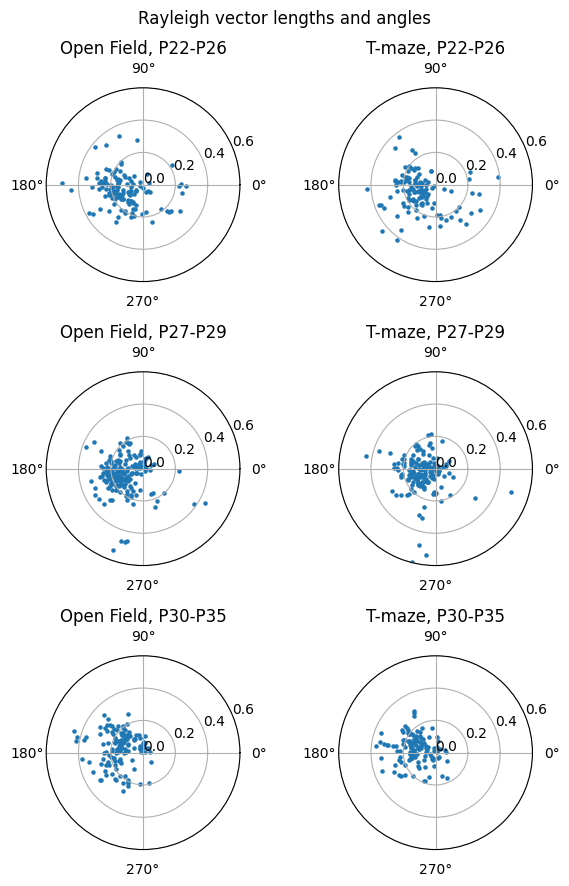

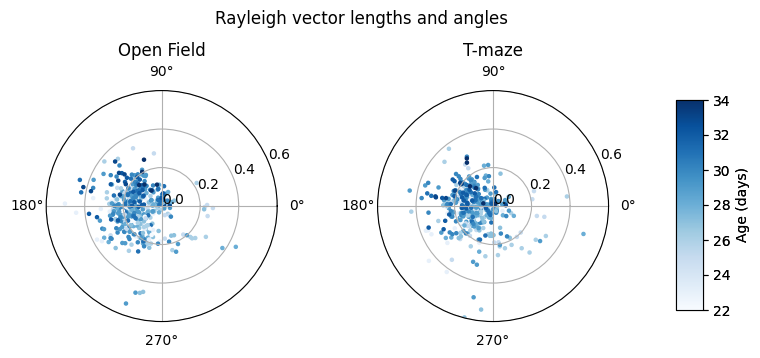

In [3]:
## Plot rayleigh vector length and angle for each cluster, binned by age and trial type
fig, ax = plt.subplots(3, 2, figsize = (6, 9))
for i, age_bin in enumerate(age_bins):
    for j, trial_type in enumerate(['open-field', 't-maze']):
        # Get data for age bin and trial type
        data = df_rayleigh.loc[(df_rayleigh['age'] >= age_bin[0]) & (df_rayleigh['age'] <= age_bin[1]) & (df_rayleigh['trial_type'] == trial_type), :]

        # Set subplot as polar
        ax[i, j] = plt.subplot(3, 2, 2*i + j + 1, projection = 'polar')
        # Plot length and angle
        ax[i, j].scatter(data['rayleigh_vector_angle'], data['rayleigh_vector_length'], s = 5)
        if trial_type == 't-maze':
            label = 'T-maze'
        elif trial_type == 'open-field':
            label = 'Open Field'
        ax[i, j].set_title(f'{label}, P{age_bin[0]}-P{age_bin[1]}')
        ax[i, j].set_rticks([0, 0.2, 0.4, 0.6])
        ax[i, j].set_rlim([0, 0.6])
        ax[i, j].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
        # ax[i, j].set_xticklabels(['0', 'π/2', 'π', '3π/2'])

fig.suptitle('Rayleigh vector lengths and angles')
plt.tight_layout()


## Plot rayleigh vector length and angle for each cluster, binned by trial type, coloured by age
fig, ax = plt.subplots(1, 3, figsize = (9, 3))
for i, trial_type in enumerate(['open-field', 't-maze']):
    # Get data for age bin and trial type
    data = df_rayleigh.loc[(df_rayleigh['trial_type'] == trial_type), :]

    # Set subplot as polar
    ax[i] = plt.subplot(1, 2, i + 1, projection = 'polar')
    # Plot length and angle
    ax[i].scatter(data['rayleigh_vector_angle'], data['rayleigh_vector_length'], s = 5, c = data['age'], cmap = 'Blues')
    if trial_type == 't-maze':
        label = 'T-maze'
    elif trial_type == 'open-field':
        label = 'Open Field'
    ax[i].set_title(f'{label}')
    ax[i].set_rticks([0, 0.2, 0.4, 0.6])
    ax[i].set_rlim([0, 0.6])
    ax[i].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    # ax[i, j].set_xticklabels(['0', 'π/2', 'π', '3π/2'])

    # Add single colorbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
    fig.colorbar(ax[i].collections[0], cax=cbar_ax, label = 'Age (days)')

fig.suptitle('Rayleigh vector lengths and angles', y = 1.15)


    

/home/isabella/anaconda3/envs/env_38/lib/python3.8/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/isabella/anaconda3/envs/env_38/lib/python3.8/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/tmp/ipykernel_38095/1837032547.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[1] = plt.subplot(1, 2, 2, projection = 'polar')


Text(0.5, 1.1, 'Difference in Rayleigh vector between open field and t-maze trials')

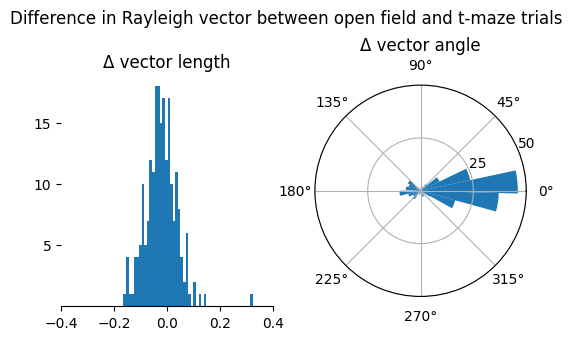

In [4]:
df_rayleigh['cell'] = df_rayleigh.index.str.split('_').str[5]
# Combine date, animal, and cell ID into unique cell ID
df_rayleigh['unique_cell'] = df_rayleigh['date'] + '_' + df_rayleigh['animal'] + '_' + df_rayleigh['cell']

# Calculate difference in rayleigh vector angle between t-maze and open field trials for each cluster
mean_vector_data_trial_type = df_rayleigh.groupby(['unique_cell','trial_type'])[['rayleigh_vector_length', 'rayleigh_vector_angle']].mean()
mean_vector_data_trial_type

# Add new row for each cell with difference in angle and vector length between t-maze and open field
mean_vector_data_trial_type = mean_vector_data_trial_type.reset_index()
mean_vector_data_trial_type['angle_diff'] = mean_vector_data_trial_type.groupby('unique_cell')['rayleigh_vector_angle'].diff()
mean_vector_data_trial_type['length_diff'] = mean_vector_data_trial_type.groupby('unique_cell')['rayleigh_vector_length'].diff()

# Plot difference in vector lengths
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
ax[0].hist(mean_vector_data_trial_type['length_diff'], bins = 50)
ax[0].set_title('Δ vector length')
ax[0].set_yticks([5, 10, 15])
ax[0].set_xlim([-0.4, 0.4])
ax[0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

# Polar plor of difference in vector angles
ax[1] = plt.subplot(1, 2, 2, projection = 'polar')
ax[1].hist(mean_vector_data_trial_type['angle_diff'], bins = 50)
ax[1].set_title('Δ vector angle')
ax[1].set_rticks([25, 50])

plt.suptitle('Difference in Rayleigh vector between open field and t-maze trials', y = 1.1)


## Calculate Rayleigh vectors for T-maze arms and compare

/data/isabella/jake/ephys_analysis/pyScan/analysis/rayleigh_vector.py:14: RuntimeWarning: invalid value encountered in scalar divide
  R = np.sqrt(sum_sin**2 + sum_cos**2) / n


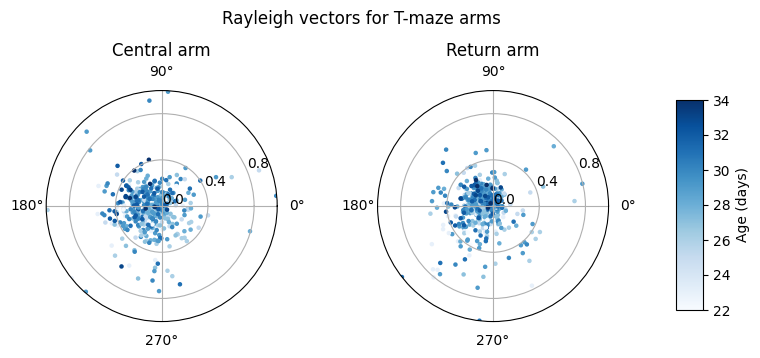

In [5]:
# Define arm sectors to include
central_sectors = [6, 7]
return_sectors = [2, 3, 10, 11]

# Select only T-maze trials from Rayleigh vector dataframe
df_rayleigh_tmaze = df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', :].copy()

# Initialise columns for storing rayleigh vector info for each arm
df_rayleigh_tmaze['central_rayleigh_length'] = np.nan
df_rayleigh_tmaze['central_rayleigh_angle'] = np.nan
df_rayleigh_tmaze['return_rayleigh_length'] = np.nan
df_rayleigh_tmaze['return_rayleigh_angle'] = np.nan
df_rayleigh_tmaze['rayleigh_angle_diff'] = np.nan
df_rayleigh_tmaze['rayleigh_length_diff'] = np.nan

# Loop through all cells and get spike phases in each arm
for index, row in df_rayleigh_tmaze.iterrows():
    
    # Get phases and sectors for cell
    phases = row['cluster_phases']

    # Make mask for central and return sectors
    central_mask = np.isin(row['cluster_sectors'], central_sectors)
    return_mask = np.isin(row['cluster_sectors'], return_sectors)

    # Get phases in central and return sectors
    central_phases = phases[central_mask]
    return_phases = phases[return_mask]

    # Calculate Rayleigh vector for each arm
    central_rayleigh_length, central_rayleigh_angle = rayleigh_vector(central_phases)
    return_rayleigh_length, return_rayleigh_angle = rayleigh_vector(return_phases)

    # Calculate difference in rayleigh vector angle and length between arms
    rayleigh_angle_diff = central_rayleigh_angle - return_rayleigh_angle
    rayleigh_length_diff = central_rayleigh_length - return_rayleigh_length

    # Add to dataframe
    df_rayleigh_tmaze.loc[index, 'central_rayleigh_length'] = central_rayleigh_length
    df_rayleigh_tmaze.loc[index, 'central_rayleigh_angle'] = central_rayleigh_angle
    df_rayleigh_tmaze.loc[index, 'return_rayleigh_length'] = return_rayleigh_length
    df_rayleigh_tmaze.loc[index, 'return_rayleigh_angle'] = return_rayleigh_angle
    df_rayleigh_tmaze.loc[index, 'rayleigh_angle_diff'] = rayleigh_angle_diff
    df_rayleigh_tmaze.loc[index, 'rayleigh_length_diff'] = rayleigh_length_diff

df_rayleigh_tmaze

# Plot vector length and angle in T-maze arms, coloured by age
fig, ax = plt.subplots(1, 2, figsize=(9, 3), subplot_kw={'projection': 'polar'})

# Get data for age bin and trial type
data = df_rayleigh_tmaze.loc[:, ['central_rayleigh_angle', 'central_rayleigh_length', 'return_rayleigh_angle', 'return_rayleigh_length', 'age']]


# Plot length and angle of rayleigh vector for each arm, coloured by age
ax[0].scatter(data[f'central_rayleigh_angle'], data[f'central_rayleigh_length'], s=5, c=data['age'], cmap='Blues')
ax[0].set_title(f'Central arm')

ax[1].scatter(data[f'return_rayleigh_angle'], data[f'return_rayleigh_length'], s=5, c=data['age'], cmap='Blues')
ax[1].set_title(f'Return arm')

for i in range(2):
    ax[i].set_rticks([0, 0.4, 0.8])
    ax[i].set_rlim([0, 1])
    ax[i].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    # ax[i, j].set_xticklabels(['0', 'π/2', 'π', '3π/2'])

# Add single colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(ax[0].collections[0], cax=cbar_ax, label='Age (days)')
plt.suptitle('Rayleigh vectors for T-maze arms', y=1.15)
plt.show()


/tmp/ipykernel_38095/1022890403.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[1] = plt.subplot(1, 2, 2, projection = 'polar')


Text(0.5, 1.1, 'Difference in Rayleigh vector between T-maze arms')

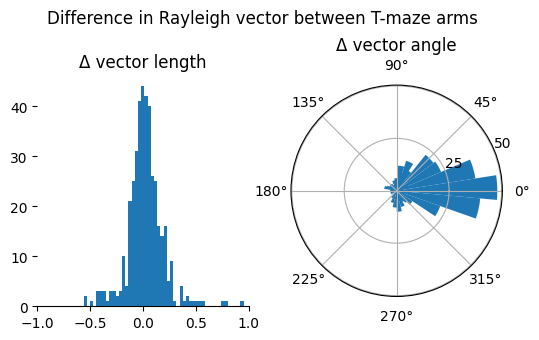

In [6]:
# Plot difference in vectors between T-maze arms
data = df_rayleigh_tmaze.loc[:, ['rayleigh_angle_diff', 'rayleigh_length_diff', 'age']]

# Plot difference in vector lengths
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
ax[0].hist(data['rayleigh_length_diff'], bins = 50)
ax[0].set_title('Δ vector length')
# ax[0].set_yticks([5, 10, 15])
ax[0].set_xlim([-1, 1])
# ax[0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

# Polar plor of difference in vector angles
ax[1] = plt.subplot(1, 2, 2, projection = 'polar')
ax[1].hist(data['rayleigh_angle_diff'], bins = 50)
ax[1].set_title('Δ vector angle')
ax[1].set_rticks([25, 50])

plt.suptitle('Difference in Rayleigh vector between T-maze arms', y = 1.1)

Text(0.1, 0.15, 'r = -0.28, p = 0.000')

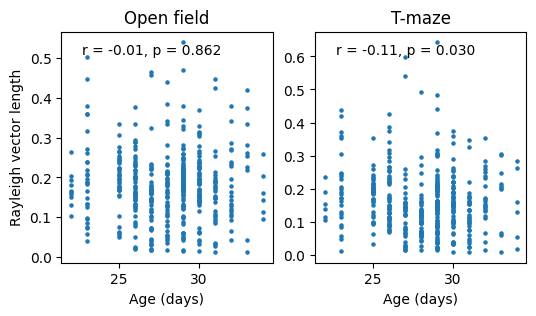

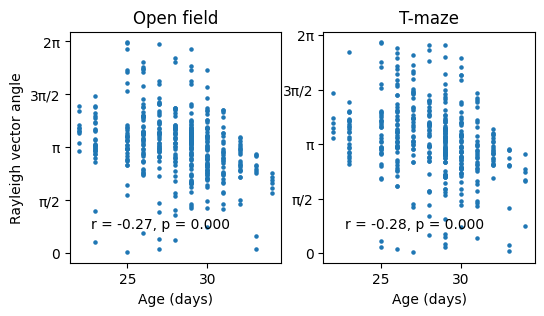

In [26]:
import numpy as np
from scipy.stats import pearsonr

# Scatter plot of absolute vector length in open field vs age
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
ax[0].scatter(df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'age'], df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'rayleigh_vector_length'], s = 5)
ax[0].set_title('Open field')
ax[0].set_xlabel('Age (days)')
ax[0].set_ylabel('Rayleigh vector length')
# Plot correlation between age and vector length and signifiance
r, p = pearsonr(df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'age'], df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'rayleigh_vector_length'])
ax[0].text(0.1, 0.9, f'r = {r:.2f}, p = {p:.3f}', transform=ax[0].transAxes)

ax[1].scatter(df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'age'], df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'rayleigh_vector_length'], s = 5)
ax[1].set_title('T-maze')
ax[1].set_xlabel('Age (days)')
# ax[1].set_ylabel('Rayleigh vector length')
# Add correlation between age and vector length to title, and significance
r, p = pearsonr(df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'age'], df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'rayleigh_vector_length'])
ax[1].text(0.1, 0.9, f'r = {r:.2f}, p = {p:.3f}', transform=ax[1].transAxes)

# Scatter plot of absolute vector angle in open field vs age (wrap into 0-2pi range)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
open_field_angles = df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'rayleigh_vector_angle']
open_field_angles_wrapped = np.where(open_field_angles < 0, open_field_angles + 2*np.pi, open_field_angles)
ax[0].scatter(df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'age'], open_field_angles_wrapped, s=5)
ax[0].set_title('Open field')
ax[0].set_xlabel('Age (days)')
ax[0].set_ylabel('Rayleigh vector angle')
ax[0].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[0].set_yticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
# Plot correlation between age and vector angle and signifiance
r, p = pearsonr(df_rayleigh.loc[df_rayleigh['trial_type'] == 'open-field', 'age'], open_field_angles_wrapped)
ax[0].text(0.1, 0.15, f'r = {r:.2f}, p = {p:.3f}', transform=ax[0].transAxes)



t_maze_angles = df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'rayleigh_vector_angle']
t_maze_angles_wrapped = np.where(t_maze_angles < 0, t_maze_angles + 2*np.pi, t_maze_angles)
ax[1].scatter(df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'age'], t_maze_angles_wrapped, s=5)
ax[1].set_title('T-maze')
ax[1].set_xlabel('Age (days)')
ax[1].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[1].set_yticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
# ax[1].set_ylabel('Rayleigh vector angle')
# Add correlation between age and vector angle to title, and significance
r, p = pearsonr(df_rayleigh.loc[df_rayleigh['trial_type'] == 't-maze', 'age'], t_maze_angles_wrapped)
ax[1].text(0.1, 0.15, f'r = {r:.2f}, p = {p:.3f}', transform=ax[1].transAxes)



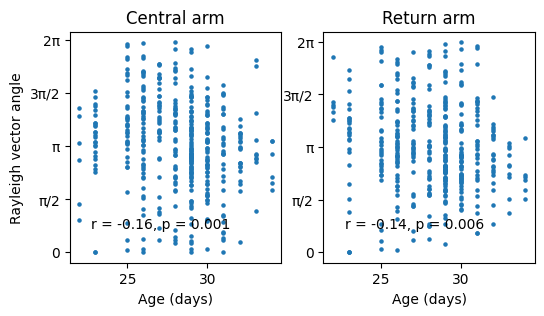

In [29]:
# Plot vector angle vs age for T-maze arms. Wrap angles into 0-2pi range
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
central_angles = df_rayleigh_tmaze['central_rayleigh_angle']
central_angles_wrapped = np.where(central_angles < 0, central_angles + 2*np.pi, central_angles)
ax[0].scatter(df_rayleigh_tmaze['age'], central_angles_wrapped, s=5)
ax[0].set_title('Central arm')
ax[0].set_xlabel('Age (days)')
ax[0].set_ylabel('Rayleigh vector angle')
ax[0].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[0].set_yticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
# Plot correlation between age and vector angle and signifiance
r, p = pearsonr(df_rayleigh_tmaze['age'], central_angles_wrapped)
ax[0].text(0.1, 0.15, f'r = {r:.2f}, p = {p:.3f}', transform=ax[0].transAxes)  

return_angles = df_rayleigh_tmaze['return_rayleigh_angle']
return_angles_wrapped = np.where(return_angles < 0, return_angles + 2*np.pi, return_angles)
ax[1].scatter(df_rayleigh_tmaze['age'], return_angles_wrapped, s=5)
ax[1].set_title('Return arm')
ax[1].set_xlabel('Age (days)')
ax[1].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[1].set_yticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
# ax[1].set_ylabel('Rayleigh vector angle')
# Add correlation between age and vector angle to title, and significance
r, p = pearsonr(df_rayleigh_tmaze['age'], return_angles_wrapped)
ax[1].text(0.1, 0.15, f'r = {r:.2f}, p = {p:.3f}', transform=ax[1].transAxes)

plt.show()
